# Data Import and Prep

In [1]:
import pandas as pd
df = pd.read_csv('developed features.csv', index_col=0)
df.sample(5)

,Protein product,Start,Stop,Strand,GeneID,Locus,Length,Protein name,Accession Version,Molecular Weight,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
139,XP_011527781.1,17513130,17626896,positive,1525,CXADR,252,coxsackievirus and adenovirus receptor isoform X4,XP_011527781.1,28070,...,3980025,7940149875,2039184,2911954752,1040400,1061208000,2653641,4322781189,3956121,7868724669
984,NP_001307312.1,44133698,44141398,positive,8209,GATD3A,251,glutamine amidotransferase-like class 1 domain...,NP_001307312.1,25098,...,6890625,18087890625,1416100,1685159000,166464,67917312,32761,5929741,6625476,17053975224
439,NP_003015.2,33718829,33888300,positive,6453,ITSN1,1721,intersectin-1 isoform ITSN-l,NP_003015.2,195291,...,148352400,1806932232000,102313225,1034898270875,37454400,229220928000,27552001,144620453249,126157824,1417004679168
673,NP_001337223.1,39390698,39396939,positive,7485,GET1,140,tail-anchored protein insertion receptor WRB i...,NP_001337223.1,15880,...,705600,592704000,693889,578009537,665856,543338496,524176,379503424,3956121,7868724669
600,XP_011527785.1,37420375,37512531,positive,1859,DYRK1A,763,dual specificity tyrosine-phosphorylation-regu...,XP_011527785.1,85453,...,62015625,488373046875,36832761,223538026509,1040400,1061208000,27552001,144620453249,20820969,95006081547


In [2]:
df.columns

Index(['Protein product', 'Start', 'Stop', 'Strand', 'GeneID', 'Locus',
       'Length', 'Protein name', 'Accession Version', 'Molecular Weight',
       ...
       'Weight of Serines**2', 'Weight of Serines**3',
       'Weight of Threonines**2', 'Weight of Threonines**3',
       'Weight of Tryptophans**2', 'Weight of Tryptophans**3',
       'Weight of Tyrosines**2', 'Weight of Tyrosines**3',
       'Weight of Valines**2', 'Weight of Valines**3'],
      dtype='object', length=276)

In [3]:
# nans identification
print(len(df))
df.isna().sum().sum()

1286


0

In [4]:
import numpy as np
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Prolines
0
Length by Serines
0
Length by Threonines
0

In [5]:
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 0


In [6]:
# code to drop duplicate row if necessary
# df.drop_duplicates(inplace=True)
# print('duplicated rows: ' + str(df.duplicated().sum()))
# print(len(df))
# df.head()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1285
Columns: 276 entries, Protein product to Weight of Valines**3
dtypes: float64(135), int64(135), object(6)
memory usage: 2.7+ MB


In [8]:
df.describe()

,Start,Stop,GeneID,Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,Number of Asparagines,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
count,1.286000e+03,1.286000e+03,1.286000e+03,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,...,1.286000e+03,1.286000e+03,1.286000e+03,1.286000e+03,1.286000e+03,1.286000e+03,1.286000e+03,1.286000e+03,1.286000e+03,1.286000e+03
mean,3.537747e+07,3.543376e+07,7.498623e+06,603.031104,66988.911353,2.923795,2.735614,41.094090,33.653966,22.014774,...,5.687738e+07,8.922051e+11,2.540221e+07,2.384163e+11,4.025879e+06,1.509881e+10,1.242462e+07,7.724787e+10,3.319987e+07,3.485832e+11
std,1.113375e+07,1.113095e+07,2.671996e+07,512.048150,57379.271578,3.834771,4.876539,38.074181,31.171885,20.795740,...,1.206209e+08,3.121939e+12,4.622673e+07,7.054570e+11,7.182308e+06,3.975207e+10,2.111155e+07,2.191508e+11,5.762971e+07,9.127697e+11
min,5.022680e+06,5.034096e+06,1.040000e+02,44.000000,4492.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.102500e+04,1.157625e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.112037e+07,3.126697e+07,5.152000e+03,249.250000,27253.000000,1.000000,0.000000,16.000000,14.000000,7.000000,...,3.980025e+06,7.940150e+09,2.039184e+06,2.911955e+09,1.664640e+05,6.791731e+07,1.179396e+06,1.280824e+09,2.683044e+06,4.394826e+09
50%,3.917559e+07,3.918338e+07,1.084100e+04,443.000000,49088.000000,2.000000,0.000000,30.000000,25.000000,14.000000,...,1.350562e+07,4.963317e+10,9.572836e+06,2.961835e+10,1.040400e+06,1.061208e+09,5.536609e+06,1.302764e+10,9.979281e+06,3.152455e+10
75%,4.401249e+07,4.409904e+07,5.668300e+04,751.000000,82982.750000,3.000000,4.000000,53.000000,42.000000,32.000000,...,4.949122e+07,3.481708e+11,2.380464e+07,1.161428e+11,3.370896e+06,6.188965e+09,1.411180e+07,5.304598e+10,3.701506e+07,2.251996e+11
max,4.663695e+07,4.666437e+07,1.122683e+08,3363.000000,380801.000000,29.000000,42.000000,294.000000,247.000000,109.000000,...,1.244678e+09,4.391225e+13,4.287384e+08,8.877458e+12,4.810810e+07,3.336778e+11,1.698330e+08,2.213264e+12,3.817725e+08,7.459453e+12


In [9]:
target = df['Locus']
features = df.drop(['Locus', 'Start', 'Stop', 'GeneID'], axis=1)

In [10]:
data = pd.get_dummies(features.drop(['Sequence', 'Accession Version', 'Protein name', 'Protein product'], axis=1))
data.sample(5)

,Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,Number of Asparagines,Number of Aspartic Acids,Number of Cysteines,Number of Glutamic Acids,...,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3,Strand_negative,Strand_positive
1282,433,48911,6,4,30,18,7,27,10,33,...,11102224,36992610368,7033104,18651791808,5536609,13027640977,16769025,68669157375,0,1
1181,543,58587,3,0,59,36,14,25,10,32,...,9572836,29618354584,2663424,4346707968,3964081,7892485271,11512449,39061739457,1,0
728,715,81958,3,9,41,41,36,23,8,61,...,17347225,72251192125,1040400,1061208000,11826721,40672093519,23011209,110384769573,0,1
1025,1503,171096,3,8,98,89,51,75,29,99,...,83960569,769330693747,45319824,305093055168,49829481,351746306379,159668496,2017571115456,0,1
574,2041,231595,9,3,121,85,101,105,55,177,...,77545636,682866870616,18352656,78622778304,134189056,1554446024704,159668496,2017571115456,0,1


In [11]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25, random_state=21)

In [12]:
print(len(target.unique()))

246


# Base Model: Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
base_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=21)
base_clf.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
target_preds_train = base_clf.predict(data_train)
acc_train = accuracy_score(target_train, target_preds_train)*100
print('Training Accuracy is: {0}'.format(acc_train))
target_preds_test = base_clf.predict(data_test)
acc_test = accuracy_score(target_test, target_preds_test)*100
print('Testing Accuracy is: {0}'.format(acc_test))
conf = confusion_matrix(target_test, target_preds_test)
print(conf)
class_report = classification_report(target_test, target_preds_test)
print(class_report)

Training Accuracy is: 13.278008298755188
Testing Accuracy is: 13.043478260869565
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
               precision    recall  f1-score   support

      ADAMTS1       0.00      0.00      0.00         1
      ADAMTS5       0.00      0.00      0.00         1
       ADARB1       0.00      0.00      0.00         6
       AGPAT3       0.00      0.00      0.00         2
          APP       0.00      0.00      0.00         3
       ATP5PF       0.00      0.00      0.00         3
       ATP5PO       0.00      0.00      0.00         1
      B3GALT5       0.00      0.00      0.00         3
        BACH1       0.00      0.00      0.00         1
        BRWD1       1.00      1.00      1.00         1
         BTG3       0.00      0.00      0.00         3
     C21orf58       0.00      0.00      0.00         5
     C21orf62       0.00      0.00      0.00         1
     C21orf91       0.00    

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    import matplotlib.pyplot as plt
    n_features = data_train.shape[1]
    plt.figure(figsize=(50,200))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature', fontsize=30)

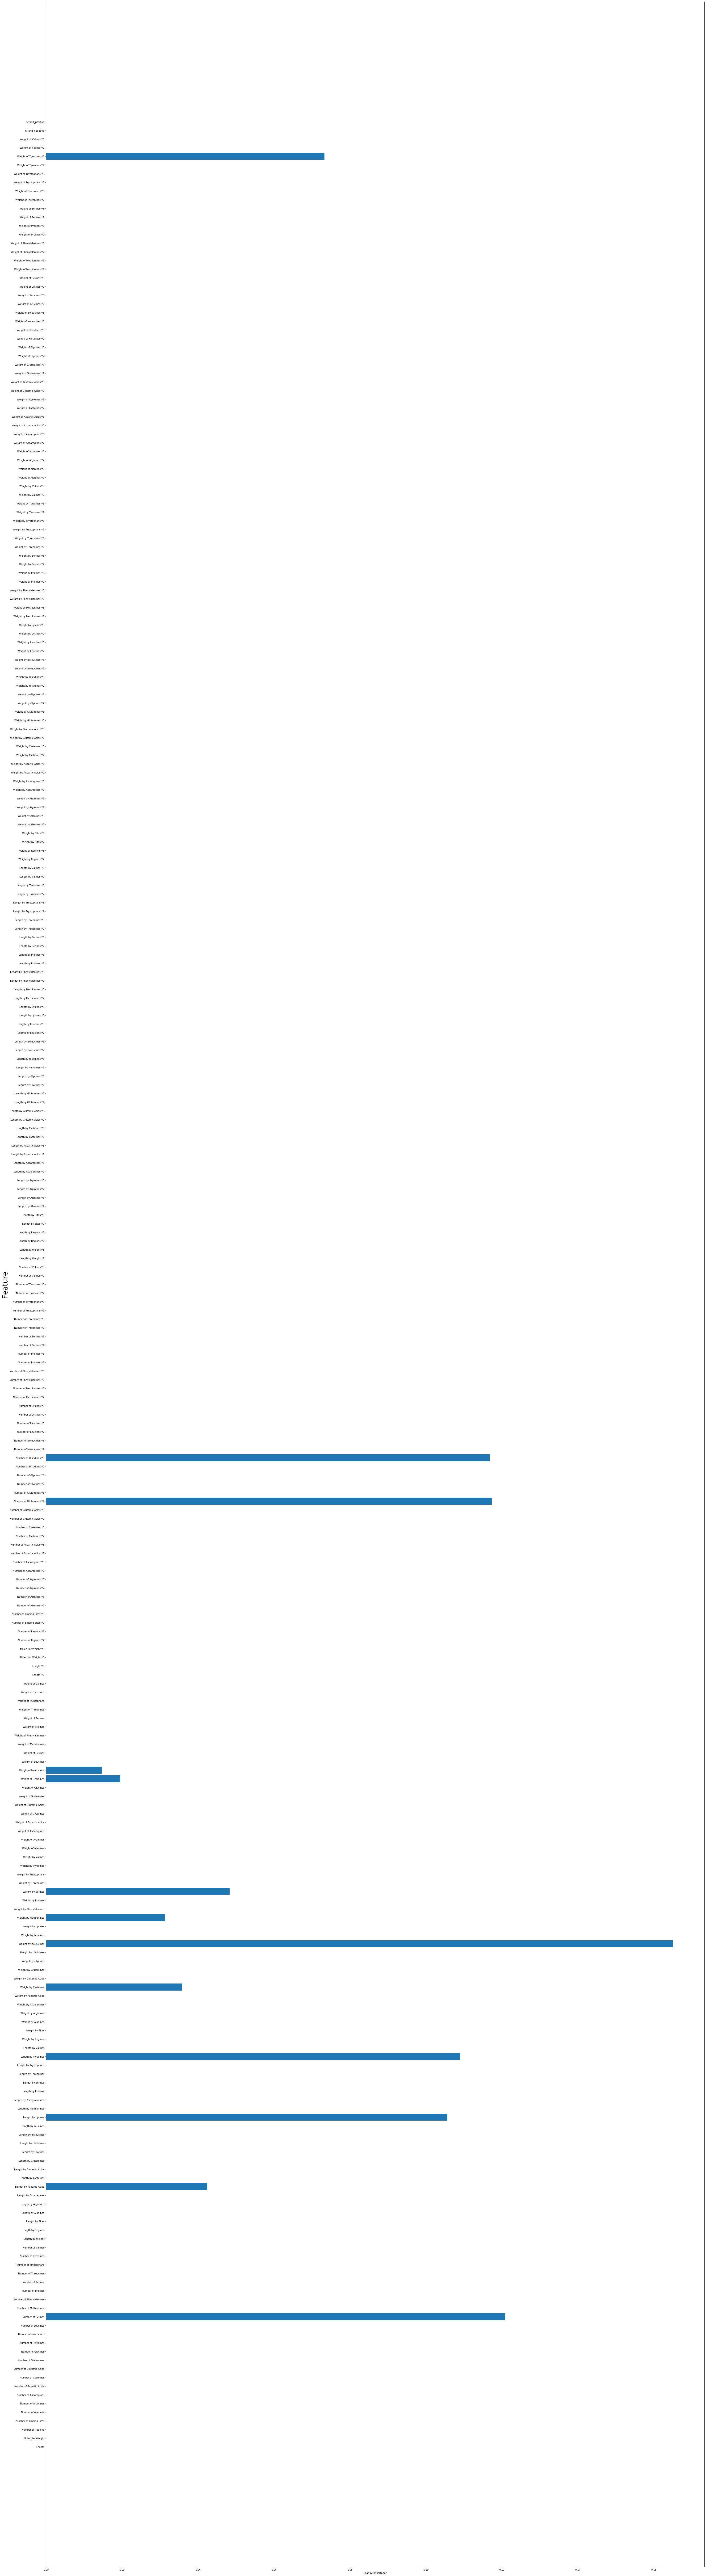

In [16]:
plot_feature_importances(base_clf)

In [17]:
feature_importance_df = pd.DataFrame()
feature_importance_df['Features'] = list(data.columns)
feature_importance_df['Importance'] = base_clf.feature_importances_
feature_importance_df.nlargest(15, 'Importance')

,Features,Importance
58,Weight by Isoleucines,0.165065
15,Number of Lysines,0.120884
109,Number of Glutamines**2,0.117335
114,Number of Histidines**3,0.116795
45,Length by Tyrosines,0.108928
38,Length by Lysines,0.105682
264,Weight of Tyrosines**3,0.073317
64,Weight by Serines,0.048303
30,Length by Aspartic Acids,0.042446
53,Weight by Cysteines,0.035751


## Training and Pruning

In [37]:
target_scores_train = base_clf.score(data_test, target_preds_test)
target_scores_train

1.0

In [20]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_auc_score
# from sklearn.multiclass import OneVsOneClassifier
# SEED = 21
# max_depths = list(range(1,100))
# roc_auc_train = []
# roc_auc_test = []
# for i in max_depths:
#     dt_test = DecisionTreeClassifier(criterion='gini', max_depth=(i), random_state=SEED)
#     dt_test.fit(data_train, target_train)
#     target_preds_train = dt_test.predict(data_train)
#     target_scores_train = dt_test.score(data_train, target_preds_train)
#     roc_auc_train.append(roc_auc_score(target_train, target_scores_train, average='macro', multi_class='ovo'))
#     target_preds_test = dt_test.predict(data_test)
#     target_scores_test = dt_test.score(data_test, target_preds_test)
#     roc_auc_test.append(roc_auc_score(target_test, target_scores_test, average='macro', multi_class='ovo'))
# plt.plot(roc_auc_train, label='Train')
# plt.plot(roc_auc_test, label='Test')
# plt.legend()
# plt.title('AUC of Max Depth')

# Bagged Model

In [32]:
from sklearn.ensemble import BaggingClassifier
tree = base_clf
bagged_tree = BaggingClassifier(tree, n_estimators=15, random_state=21)
bagged_tree.fit(data_train, target_train)
target_pred_train = bagged_tree.predict(data_train)
target_pred_test = bagged_tree.predict(data_test)
acc_train = accuracy_score(target_train, target_preds_train)*100
acc_test = accuracy_score(target_test, target_preds_test)*100
print('Training Accuracy is: {0}'.format(acc_train))
print('Testing Accuracy is: {0}'.format(acc_test))

Training Accuracy is: 13.278008298755188
Testing Accuracy is: 13.043478260869565


In [33]:
feature_importance_df = pd.DataFrame()
feature_importance_df['Features'] = list(data.columns)
feature_importances = np.mean([tree.feature_importances_ for tree in bagged_tree.estimators_], axis=0)
feature_importance_df['Importance'] = feature_importances
feature_importance_df.nlargest(90, 'Importance')

,Features,Importance
58,Weight by Isoleucines,0.141745
113,Number of Histidines**2,0.051460
166,Length by Lysines**3,0.038747
109,Number of Glutamines**2,0.031058
56,Weight by Glycines,0.029997
...,...,...
6,Number of Asparagines,0.001557
5,Number of Arginines,0.001534
95,Number of Binding Sites**2,0.001467
20,Number of Threonines,0.001454


# Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=21)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [34]:
target_pred_train = forest.predict(data_train)
target_pred_test = forest.predict(data_test)
acc_train = accuracy_score(target_train, target_preds_train)*100
acc_test = accuracy_score(target_test, target_preds_test)*100
print('Training Accuracy is: {0}'.format(acc_train))
print('Testing Accuracy is: {0}'.format(acc_test))

Training Accuracy is: 13.278008298755188
Testing Accuracy is: 13.043478260869565


In [35]:
feature_importance_df = pd.DataFrame()
feature_importance_df['Features'] = list(data.columns)
feature_importances = forest.feature_importances_
feature_importance_df['Importance'] = feature_importances
feature_importance_df.nlargest(110, 'Importance')

,Features,Importance
58,Weight by Isoleucines,0.032073
119,Number of Lysines**2,0.031852
56,Weight by Glycines,0.029632
232,Weight of Asparagines**3,0.024886
166,Length by Lysines**3,0.024669
...,...,...
129,Number of Threonines**2,0.001590
81,Weight of Methionines,0.001437
0,Length,0.001432
18,Number of Prolines,0.001383


References
https://stackoverflow.com/questions/44333573/feature-importances-bagging-scikit-learn # feature importances for bagged model
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html # multiclass roc